# 第一节数据分析项目流程

## 1.明确问题

## 2.理解数据

●对数据进行一些基本处理

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os

import six

os.chdir('./')

In [2]:
#导入可视化库
import plotly as py 
import plotly.graph_objs as go
py.offline.init_notebook_mode()# 初始化步骤
pyplot = py.offline.iplot #并画图函数

In [3]:
online_data = pd.read_csv('data.csv',encoding='ISO-8859-1',dtype={'CustomerID':str})
# 读取数据时指定类型，不然读进来是int

In [4]:
online_data.head() #查看前5行

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice CustomerID         Country  
0  12/1/2010 8:26       2.55      17850  United Kingdom  
1  12/1/2010 8:26       3.39      17850  United Kingdom  
2  12/1/2010 8:26       2.75      17850  United Kingdom  
3  12/1/2010 8:26       3.39      17850  United Kingdom  
4  12/1/2010 8:26       3.39      17850  United Kingdom

In [5]:
type(online_data)

pandas.core.frame.DataFrame

In [6]:
online_data.shape # 查看样本量、特征量

(541909, 8)

In [7]:
online_data.info()#查看数据情况

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [8]:
online_data.isnull()

InvoiceNo  StockCode  Description  Quantity  InvoiceDate  UnitPrice  \
0           False      False        False     False        False      False   
1           False      False        False     False        False      False   
2           False      False        False     False        False      False   
3           False      False        False     False        False      False   
4           False      False        False     False        False      False   
...           ...        ...          ...       ...          ...        ...   
541904      False      False        False     False        False      False   
541905      False      False        False     False        False      False   
541906      False      False        False     False        False      False   
541907      False      False        False     False        False      False   
541908      False      False        False     False        False      False   

        CustomerID  Country  
0            False    False  
1            False    False  
2            False    False  
3            False    False  
4            False    False  
...            ...      ...  
541904       False    False  
541905       False    False  
541906       False    False  
541907       False    False  
541908       False    False  

[541909 rows x 8 columns]

In [9]:
# 统计缺失率
print(online_data.apply(lambda x: sum(x.isnull()),axis=0))  # 统计每列缺失值个数
online_data.apply(lambda x: sum(x.isnull())/len(x),axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

●通过统计缺失率可以发现，CustomID存在部分缺失,无法进行填充，需要删除缺失的数据。订
单日期和格式需要调整，方便后续分析。

In [10]:
#剔除缺失值
df1 = online_data.dropna(how='any').copy() # 任何一个特征有缺失，直接删除该样本

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      406829 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 27.9+ MB


In [12]:
# 通过info分析，发现InvoiceDate是字符串，要变为时间类型，12/1/2010 8:26转换为2010-12-01
# errors的几个参数值：
# 'ignore'：如果遇到无法解析的日期，该函数将忽略这些无法解析的字符串，并且不会抛出异常。
# 'raise'：如果遇到无法解析的日期，该函数将抛出一个 ValueError 异常。
# 'coerce'：如果遇到无法解析的日期，该函数将把那些无法解析的字符串转换为 NaT（Not a Time，即Pandas中的“非时间”标记。
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'], errors ='coerce' )

In [13]:
df1.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  
0 2010-12-01 08:26:00       2.55      17850  United Kingdom  
1 2010-12-01 08:26:00       3.39      17850  United Kingdom  
2 2010-12-01 08:26:00       2.75      17850  United Kingdom  
3 2010-12-01 08:26:00       3.39      17850  United Kingdom  
4 2010-12-01 08:26:00       3.39      17850  United Kingdom

In [14]:
df1.shape

(406829, 8)

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [16]:
print(df1['InvoiceDate'].dtype)
print(type(df1['InvoiceDate'].dt))
print("-"*50)

# dt 访问器
# .dt 访问器是附加到 datetime64 类型列上的一个属性，它允许您访问和修改时间序列数据。
# .dt 提供了对 datetime 对象的日、月、年等时间属性的访问，例如：
print(df1['InvoiceDate'].dt.year)  # 访问年份，int32
print("-"*50)
print(df1['InvoiceDate'].dt.month)  # 访问月份，int32
print("-"*50)
print(df1['InvoiceDate'].dt.day)    # 访问日期，int32
print("-"*50)
print(df1['InvoiceDate'].dt.date) # 访问年月日，即具体时间，object

datetime64[ns]
<class 'pandas.core.indexes.accessors.DatetimeProperties'>
--------------------------------------------------
0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: InvoiceDate, Length: 406829, dtype: int32
--------------------------------------------------
0         12
1         12
2         12
3         12
4         12
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: InvoiceDate, Length: 406829, dtype: int32
--------------------------------------------------
0         1
1         1
2         1
3         1
4         1
         ..
541904    9
541905    9
541906    9
541907    9
541908    9
Name: InvoiceDate, Length: 406829, dtype: int32
--------------------------------------------------
0         2010-12-01
1         2010-12-01
2         2010-12-01
3         2010-12-01
4         2010-12-01
             ...    
541904    20

In [17]:
print(df1['InvoiceDate'])
type(df1['InvoiceDate'].index)

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 406829, dtype: datetime64[ns]


pandas.core.indexes.base.Index

In [18]:
df2 = df1.copy()
df2['InvoiceDate'] = df2['InvoiceDate'].dt.month
df2.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

   InvoiceDate  UnitPrice CustomerID         Country  
0           12       2.55      17850  United Kingdom  
1           12       3.39      17850  United Kingdom  
2           12       2.75      17850  United Kingdom  
3           12       3.39      17850  United Kingdom  
4           12       3.39      17850  United Kingdom

In [19]:
# 取用日期部分，赋值到InvoiceDate这一列，由时间戳datetime64[ns]变回字符串object
df1['InvoiceDate'] = df1['InvoiceDate'].dt.date

In [20]:
df1.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

  InvoiceDate  UnitPrice CustomerID         Country  
0  2010-12-01       2.55      17850  United Kingdom  
1  2010-12-01       3.39      17850  United Kingdom  
2  2010-12-01       2.75      17850  United Kingdom  
3  2010-12-01       3.39      17850  United Kingdom  
4  2010-12-01       3.39      17850  United Kingdom

●取用日期部分或者用以下方法实现

●df1['InvoiceDate] = df1['InvoiceDate'].apply(lambda x: x.strftime("%Y-%m-%d")) 
#将datetime64[ns]转化为object
●strptime(detester,' %Y-%m-%d)#字符串转日期

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      406829 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 27.9+ MB


In [22]:
df1.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

  InvoiceDate  UnitPrice CustomerID         Country  
0  2010-12-01       2.55      17850  United Kingdom  
1  2010-12-01       3.39      17850  United Kingdom  
2  2010-12-01       2.75      17850  United Kingdom  
3  2010-12-01       3.39      17850  United Kingdom  
4  2010-12-01       3.39      17850  United Kingdom

### 计算每个订单的金额

●新建一个销售金额的字段，即用产品数量乘以单价。
●使用apply函数，0代表按行进行计算,然后对每一列做同样的操作, 1代表按列进行计算，然后对每一行做同样的操作

In [23]:
# 看一眼第一个样本
print(df1.iloc[0])

InvoiceNo                                  536365
StockCode                                  85123A
Description    WHITE HANGING HEART T-LIGHT HOLDER
Quantity                                        6
InvoiceDate                            2010-12-01
UnitPrice                                    2.55
CustomerID                                  17850
Country                            United Kingdom
Name: 0, dtype: object


In [24]:
print(df1.apply(lambda x: x[3] * x[5],axis=1))

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Length: 406829, dtype: float64


In [27]:
# 计算总价，三种写法一样
df1['Price'] = df1.apply(lambda x: x[3] * x[5],axis=1)
# df1['Price'] = df1.apply(lambda x: x.iloc[3] * x.iloc[5],axis=1)
# df1['Price'] = df1['Quantity'] * df1['UnitPrice']

In [28]:
# 计算总价后的数据如下:
df1.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

  InvoiceDate  UnitPrice CustomerID         Country  Price1  Price  
0  2010-12-01       2.55      17850  United Kingdom   15.30  15.30  
1  2010-12-01       3.39      17850  United Kingdom   20.34  20.34  
2  2010-12-01       2.75      17850  United Kingdom   22.00  22.00  
3  2010-12-01       3.39      17850  United Kingdom   20.34  20.34  
4  2010-12-01       3.39      17850  United Kingdom   20.34  20.34

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      406829 non-null  object 
 8   Price        406829 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 31.0+ MB


# 4.数据分析和可视化

# 第一个问题:购买商品数前十的国家是?

In [28]:
# 获取产品数量大于0，按国家分组，对产品数量进行求和，从大到小进行排序，取前十的国家

In [27]:
df1[df1['Quantity']<0].head()

InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

    InvoiceDate  UnitPrice CustomerID         Country  Price  
141  2010-12-01      27.50      14527  United Kingdom -27.50  
154  2010-12-01       4.65      15311  United Kingdom  -4.65  
235  2010-12-01       1.65      17548  United Kingdom -19.80  
236  2010-12-01       0.29      17548  United Kingdom  -6.96  
237  2010-12-01       0.29      17548  United Kingdom  -6.96

In [28]:
# 小于0的是退货
df1[df1['Quantity']<0].shape

(8905, 9)

In [29]:
df1[df1['Quantity']>0].groupby('Country')['Quantity'].sum()

Country
Australia                 84209
Austria                    4881
Bahrain                     260
Belgium                   23237
Brazil                      356
Canada                     2763
Channel Islands            9491
Cyprus                     6361
Czech Republic              671
Denmark                    8235
EIRE                     140525
European Community          499
Finland                   10704
France                   111472
Germany                  119263
Greece                     1557
Iceland                    2458
Israel                     4046
Italy                      8112
Japan                     26016
Lebanon                     386
Lithuania                   652
Malta                       970
Netherlands              200937
Norway                    19338
Poland                     3684
Portugal                  16122
RSA                         352
Saudi Arabia                 80
Singapore                  5241
Spain                     27951


In [31]:
df1[df1['Quantity']>0].groupby('Country')[['Quantity','Price']].sum()

Quantity        Price
Country                                    
Australia                84209   138521.310
Austria                   4881    10198.680
Bahrain                    260      548.400
Belgium                  23237    41196.340
Brazil                     356     1143.600
Canada                    2763     3666.380
Channel Islands           9491    20450.440
Cyprus                    6361    13590.380
Czech Republic             671      826.740
Denmark                   8235    18955.340
EIRE                    140525   265545.900
European Community         499     1300.250
Finland                  10704    22546.080
France                  111472   209024.050
Germany                 119263   228867.140
Greece                    1557     4760.520
Iceland                   2458     4310.000
Israel                    4046     7221.690
Italy                     8112    17483.240
Japan                    26016    37416.370
Lebanon                    386     1693.880
Lithuania                  652     1661.060
Malta                      970     2725.590
Netherlands             200937   285446.340
Norway                   19338    36165.440
Poland                    3684     7334.650
Portugal                 16122    33439.890
RSA                        352     1002.310
Saudi Arabia                80      145.920
Singapore                 5241    21279.290
Spain                    27951    61577.110
Sweden                   36083    38378.330
Switzerland              30083    56443.950
USA                       2458     3580.390
United Arab Emirates       982     1902.280
United Kingdom         4269472  7308391.554
Unspecified               1789     2667.070

In [32]:
# 购买商品数前10的国家
df1[df1['Quantity']>0].groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)

Country
United Kingdom    4269472
Netherlands        200937
EIRE               140525
Germany            119263
France             111472
Australia           84209
Sweden              36083
Switzerland         30083
Spain               27951
Japan               26016
Name: Quantity, dtype: int64

In [33]:
quantity_first_10 = df1[df1['Quantity']>0].groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)
quantity_first_10

Country
United Kingdom    4269472
Netherlands        200937
EIRE               140525
Germany            119263
France             111472
Australia           84209
Sweden              36083
Switzerland         30083
Spain               27951
Japan               26016
Name: Quantity, dtype: int64

In [36]:
print(quantity_first_10.index)
print(quantity_first_10.values) # ndarray
print("-"*50)
print(quantity_first_10.index.tolist())
print(quantity_first_10.values.tolist())

Index(['United Kingdom', 'Netherlands', 'EIRE', 'Germany', 'France',
       'Australia', 'Sweden', 'Switzerland', 'Spain', 'Japan'],
      dtype='object', name='Country')
[4269472  200937  140525  119263  111472   84209   36083   30083   27951
   26016]
--------------------------------------------------
['United Kingdom', 'Netherlands', 'EIRE', 'Germany', 'France', 'Australia', 'Sweden', 'Switzerland', 'Spain', 'Japan']
[4269472, 200937, 140525, 119263, 111472, 84209, 36083, 30083, 27951, 26016]


In [35]:
trace_basic=[go.Bar(x =quantity_first_10.index.tolist(),y =quantity_first_10.values.tolist(),
                    marker=dict(color='orange'),opacity=0.50)]#透明度
layout = go.Layout(title ='购买商品前10的国家',xaxis =dict(title ='国家'))
figure_basic = go.Figure(data = trace_basic,layout=layout)# data与layout组成一一个图象对象
pyplot(figure_basic) #输出

# 第二个问题:交易额前十的国家是?

In [36]:
# 获取产品数量大于0，按国家分组，对销售金额进行求和，从大到小进行排序

In [37]:
trans=df1[df1['Quantity']>0].groupby('Country')['Price'].sum().sort_values(ascending=False).head(10)
trans

Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Australia          138521.310
Spain               61577.110
Switzerland         56443.950
Belgium             41196.340
Sweden              38378.330
Name: Price, dtype: float64

In [38]:
trace_basic = [go.Bar(x =trans.index.tolist(),y=trans.values.tolist(),
                marker=dict(color='orange'), opacity=0.50)] #透明度
layout = go.Layout(title = '交易额前10的国家',xaxis=dict(title ='国家'))
figure_basic = go.Figure(data = trace_basic, layout=layout) #data与layout组成一个图象对象
pyplot(figure_basic) #输出


●可以看出:英国的交易额最大，由于购买数最多，交易额理所当然也是最大。除此之外，荷兰, 爱尔兰，德国
法国也是主要消费国家，需要重点关注

## 第三个问题:哪些月份销量较佳?

In [40]:
# 注意此时df1['InvoiceDate']已经是object，要先变回时间戳，才能用dt
df1['month'] = pd.to_datetime(df1['InvoiceDate']).dt.month # 取出月份数,增加一列月份数据

In [41]:
df1.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

  InvoiceDate  UnitPrice CustomerID         Country  Price  month  
0  2010-12-01       2.55      17850  United Kingdom  15.30     12  
1  2010-12-01       3.39      17850  United Kingdom  20.34     12  
2  2010-12-01       2.75      17850  United Kingdom  22.00     12  
3  2010-12-01       3.39      17850  United Kingdom  20.34     12  
4  2010-12-01       3.39      17850  United Kingdom  20.34     12

In [42]:
print(df1.iloc[0])

df1.iloc[-1]  # 拿最后一个样本，实际数据是从2010年12月1号，到2011年12月9号

InvoiceNo                                  536365
StockCode                                  85123A
Description    WHITE HANGING HEART T-LIGHT HOLDER
Quantity                                        6
InvoiceDate                            2010-12-01
UnitPrice                                    2.55
CustomerID                                  17850
Country                            United Kingdom
Price                                        15.3
month                                          12
Name: 0, dtype: object


InvoiceNo                             581587
StockCode                              22138
Description    BAKING SET 9 PIECE RETROSPOT 
Quantity                                   3
InvoiceDate                       2011-12-09
UnitPrice                               4.95
CustomerID                             12680
Country                               France
Price                                  14.85
month                                     12
Name: 541908, dtype: object

In [42]:
pd.to_datetime(df1['InvoiceDate']).dt.year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: InvoiceDate, Length: 406829, dtype: int32

In [43]:
pd.to_datetime(df1['InvoiceDate']).dt.day

0         1
1         1
2         1
3         1
4         1
         ..
541904    9
541905    9
541906    9
541907    9
541908    9
Name: InvoiceDate, Length: 406829, dtype: int32

In [44]:
# df1.describe()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      406829 non-null  object 
 8   Price        406829 non-null  float64
 9   month        406829 non-null  int32  
dtypes: float64(2), int32(1), int64(1), object(6)
memory usage: 32.6+ MB


In [44]:
# 发现每年9-12月销量较高
df1[df1['Quantity']>0].groupby('month')['Quantity'].sum().sort_values(ascending=False)

month
11    681888
12    599693
10    593908
9     544899
8     398938
5     373685
7     369432
6     363699
1     349147
3     348544
4     292225
2     265638
Name: Quantity, dtype: int64

In [46]:
df1.tail()

InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

       InvoiceDate  UnitPrice CustomerID Country  Price  month  
541904  2011-12-09       0.85      12680  France  10.20     12  
541905  2011-12-09       2.10      12680  France  12.60     12  
541906  2011-12-09       4.15      12680  France  16.60     12  
541907  2011-12-09       4.15      12680  France  16.60     12  
541908  2011-12-09       4.95      12680  France  14.85     12

In [47]:
df1.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

  InvoiceDate  UnitPrice CustomerID         Country  Price  month  
0  2010-12-01       2.55      17850  United Kingdom  15.30     12  
1  2010-12-01       3.39      17850  United Kingdom  20.34     12  
2  2010-12-01       2.75      17850  United Kingdom  22.00     12  
3  2010-12-01       3.39      17850  United Kingdom  20.34     12  
4  2010-12-01       3.39      17850  United Kingdom  20.34     12

In [47]:
import seaborn as sns
sns.set(style='darkgrid',context='notebook',font_scale=1.2) #设置背景
#支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [48]:
df_month=df1[df1['Quantity']>0].groupby('month')['Quantity'].sum().sort_values(ascending=False).head(12)
df_month

month
11    681888
12    599693
10    593908
9     544899
8     398938
5     373685
7     369432
6     363699
1     349147
3     348544
4     292225
2     265638
Name: Quantity, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '11'),
  Text(1, 0, '12'),
  Text(2, 0, '10'),
  Text(3, 0, '9'),
  Text(4, 0, '8'),
  Text(5, 0, '5'),
  Text(6, 0, '7'),
  Text(7, 0, '6'),
  Text(8, 0, '1'),
  Text(9, 0, '3'),
  Text(10, 0, '4'),
  Text(11, 0, '2')])

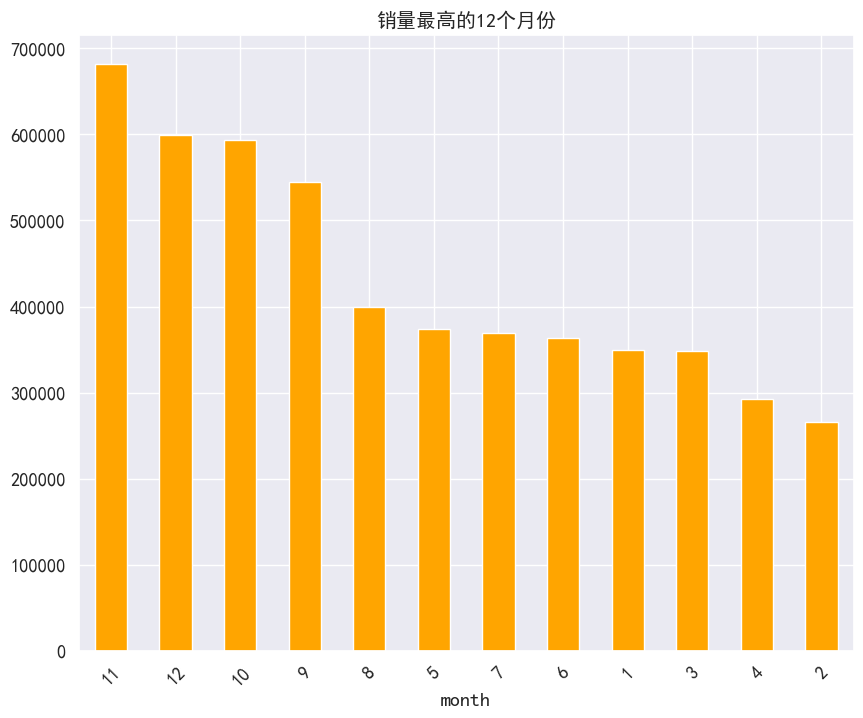

In [49]:
df_month.plot(kind ='bar',figsize=(10,8),title='销量最高的12个月份',color='orange')  # dataframe自带的画图
plt.xticks(rotation=45)

# 第四个问题:平均客单价多少?

●客单价即平均交易金额，是每个顾客平均消费金额的指标
●客单价的计算方法：
1、客单价 = 成交总额 / 顾客总数
2、客单价 = 总销售额 / 成交次数
●销售额是由客单价和用户数所决定的，要提升产品的销售额,除了尽可能多地吸引客流，增加顾客交易次数以外，提高客单价也是非常重要的途径。

In [90]:
#按照每个订单来计算客单价
sumPrice=df1[df1['Quantity']>0]['Price'].sum()
print(sumPrice)  # 销售总额
print('-'*50)

countID=df1[df1['Quantity']>0].groupby('InvoiceNo').count().shape
print(df1[df1['Quantity']>0].groupby('InvoiceNo').count())
print(countID) # 总订单数，也就是总成交数
print('-'*50)

#print(df1[df1['Quantity']>0].groupby('InvoiceNo').count().sum())
# 注意，如果用sum，得到的是总成交量。因为一单可能被拆成了几个样本

avgPrice = sumPrice/countID[0]
print(avgPrice)  #平均客单价


8911407.904
--------------------------------------------------
           StockCode  Description  Quantity  InvoiceDate  UnitPrice  \
InvoiceNo                                                             
536365             7            7         7            7          7   
536366             2            2         2            2          2   
536367            12           12        12           12         12   
536368             4            4         4            4          4   
536369             1            1         1            1          1   
...              ...          ...       ...          ...        ...   
581583             2            2         2            2          2   
581584             2            2         2            2          2   
581585            21           21        21           21         21   
581586             4            4         4            4          4   
581587            15           15        15           15         15   

           Cu

In [61]:
#按照用户来计算客单价
user_count=df1[df1['Quantity']>0].groupby('CustomerID').count().shape
print(user_count)
print('-'*50)

avgPrice1 = sumPrice/user_count[0]
print(avgPrice1)

(4339, 9)
--------------------------------------------------
2053.7930177460244


In [67]:
df1.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

  InvoiceDate  UnitPrice CustomerID         Country  Price  month  
0  2010-12-01       2.55      17850  United Kingdom  15.30     12  
1  2010-12-01       3.39      17850  United Kingdom  20.34     12  
2  2010-12-01       2.75      17850  United Kingdom  22.00     12  
3  2010-12-01       3.39      17850  United Kingdom  20.34     12  
4  2010-12-01       3.39      17850  United Kingdom  20.34     12  
5  2010-12-01       7.65      17850  United Kingdom  15.30     12  
6  2010-12-01       4.25      17850  United Kingdom  25.50     12  
7  2010-12-01       1.85      17850  United Kingdom  11.10     12  
8  2010-12-01       1.85      17850  United Kingdom  11.10     12  
9  2010-12-01       1.69      13047  United Kingdom  54.08     12

In [82]:
print(df1[df1['Quantity']>0].shape) # 397924 = 去掉了退货的样本数 = 406829 - 8905，即有8905个样本是退货
print(df1[df1['Quantity']<0].shape) # 8905
print("-"*50)

print(len(set(df1['InvoiceNo'].tolist())))  # 包括了退货在内的总订单数，22190
print(len(set(df1[df1['Quantity']>0]['InvoiceNo'].tolist())))  # 去掉了退货的总订单数，也就是卖出的总成交数,18536
print("-"*50)

print(df1.shape)  # 406829，总样本数
df1.duplicated('InvoiceNo').sum()  # 384639 = 406829-22190 = 总样本数 - 总订单数 = 被拆开成样本了

(397924, 10)
(8905, 10)
--------------------------------------------------
22190
18536
--------------------------------------------------
(406829, 10)


384639

In [79]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      406829 non-null  object 
 8   Price        406829 non-null  float64
 9   month        406829 non-null  int32  
dtypes: float64(2), int32(1), int64(1), object(6)
memory usage: 32.6+ MB


# 第五个问题:用户消费行为分析

●用户消费行为分析主要从用户消费次数，用户消费金额，用户购买产品数量这三个维度进行分析。

●首先计算每个消费者用户的消费次数,消费金额和用户购买的产品数量

●然后在计算用户的平均情况

In [94]:
customer = df1[df1['Quantity']>0].groupby('CustomerID').agg({'InvoiceNo': 'nunique', #nunique先去重再求和
                                                            'Quantity': "sum", #产品数量
                                                            'Price': np.sum})#消费总金额

In [95]:
customer.describe()

InvoiceNo       Quantity          Price
count  4339.000000    4339.000000    4339.000000
mean      4.271952    1194.214335    2053.793018
std       7.705493    5055.603049    8988.248381
min       1.000000       1.000000       0.000000
25%       1.000000     160.000000     307.245000
50%       2.000000     379.000000     674.450000
75%       5.000000     993.000000    1661.640000
max     210.000000  197491.000000  280206.020000

In [96]:
customer.head(10)

InvoiceNo  Quantity     Price
CustomerID                               
12346               1     74215  77183.60
12347               7      2458   4310.00
12348               4      2341   1797.24
12349               1       631   1757.55
12350               1       197    334.40
12352               8       536   2506.04
12353               1        20     89.00
12354               1       530   1079.40
12355               1       240    459.40
12356               3      1591   2811.43

### 这里说明了，一个订单被分成了多个样本，每个样本对应了一种产品（也许）

In [98]:
df2=df1[df1['Quantity']>0]

# 可以得到用户12347的所有订单，以及每个订单中的产品数量
df2[df2['CustomerID']=='12347'].groupby('InvoiceNo').count()  #一个订单中的产品数量

StockCode  Description  Quantity  InvoiceDate  UnitPrice  \
InvoiceNo                                                             
537626            31           31        31           31         31   
542237            29           29        29           29         29   
549222            24           24        24           24         24   
556201            18           18        18           18         18   
562032            22           22        22           22         22   
573511            47           47        47           47         47   
581180            11           11        11           11         11   

           CustomerID  Country  Price  month  
InvoiceNo                                     
537626             31       31     31     31  
542237             29       29     29     29  
549222             24       24     24     24  
556201             18       18     18     18  
562032             22       22     22     22  
573511             47       47     47     47  
581180             11       11     11     11

# 5结论和建议

通过以上计算可看出:
●用户平均消费4次，有的客户甚至消费高达210次，产品的忠诚客户。

●用户平均消费金额为2053元，而75%的用户消费金额只有1661，中位数只有674，
 可见，有些用户消费金额较大，属于非常有价值的用户，需要重点保持关注。

●用户购买产品数量平均高达1194件,由于销售对象主要是批发商，算是正常的数量数。